In [216]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf

In [217]:


def get_spy_data(start_date, end_date):
    """
    Function to fetch historical data for the SPY index from Google Finance.

    Parameters:
    start_date (str): Start date for historical data in the format 'YYYY-MM-DD'.
    end_date (str): End date for historical data in the format 'YYYY-MM-DD'.

    Returns:
    pandas.DataFrame: DataFrame containing historical data for the SPY index.
    """
    ticker_symbol = 'SPY'

    spy_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    return spy_data


from datetime import date
today = date.today()
current_date = today.strftime("%Y-%m-%d")
start_date = '2010-01-01'
end_date = current_date
spy_data = get_spy_data(start_date, end_date)
spy_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.860046,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.089989,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.151283,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.519241,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.810463,126402800


**Data Cleaning**

In [218]:

spy_data.index = pd.to_datetime(spy_data.index)

In [219]:

spy_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.860046,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.089989,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.151283,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.519241,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.810463,126402800


In [220]:

spy_data = spy_data.asfreq("B")

In [221]:
spy_data.ffill(inplace=True)

rows_with_missing_values = spy_data[spy_data.isnull().any(axis=1)]

if not rows_with_missing_values.empty:
    print("First row with missing values:")
    print(rows_with_missing_values.iloc[0])
else:
    print("No rows with missing values found.")


No rows with missing values found.


In [222]:
(spy_data.describe()).round(3)

,Open,High,Low,Close,Adj Close,Volume
count,3744.000,3744.000,3744.000,3744.000,3744.000,3.744000e+03
mean,259.459,260.865,257.942,259.512,237.066,1.142449e+08
std,112.223,112.862,111.541,112.246,119.146,6.888917e+07
min,103.110,103.420,101.130,102.200,79.026,2.027000e+07
25%,167.245,167.767,166.360,167.112,137.173,6.864678e+07
50%,234.470,235.245,233.485,234.580,208.363,9.449015e+07
75%,343.052,345.347,339.855,342.778,324.924,1.382994e+08
max,523.830,524.610,522.780,523.170,523.170,7.178287e+08


In [223]:
from docx import Document

df = spy_data.describe().round(3)

doc = Document()

doc.add_heading('SPY Index Data Description', 0)

table = doc.add_table(df.shape[0]+1, df.shape[1]+1)

table.cell(0,0).text = 'Measure'
for j in range(df.shape[-1]):
    table.cell(0,j+1).text = df.columns[j]

for i in range(df.shape[0]):
    table.cell(i+1,0).text = df.index[i]
    for j in range(df.shape[-1]):
        table.cell(i+1,j+1).text = str(df.values[i,j])

doc.save('C:\\Users\\ELITEBOOK\\Desktop\\Shahdat\\SPY_data_description.docx')


**Data Visualization**

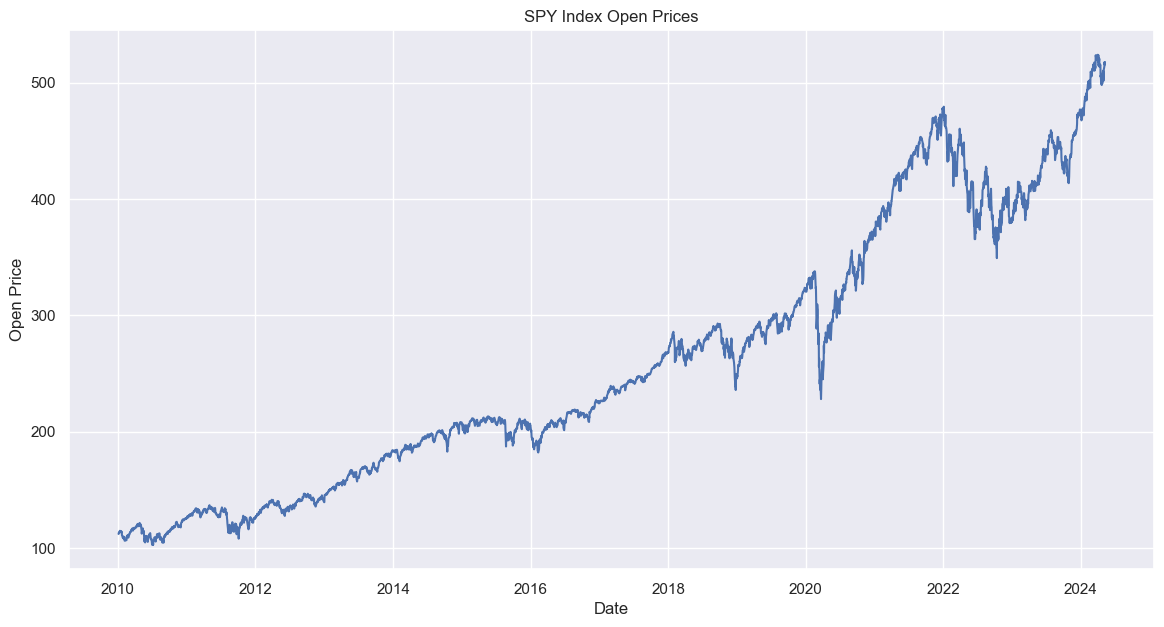

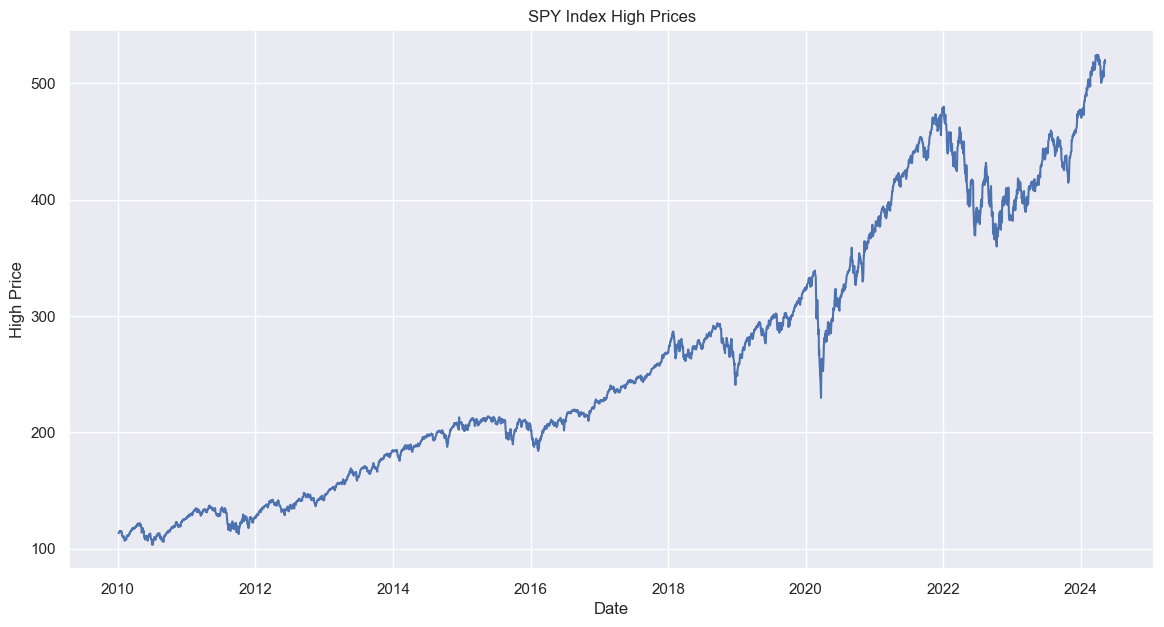

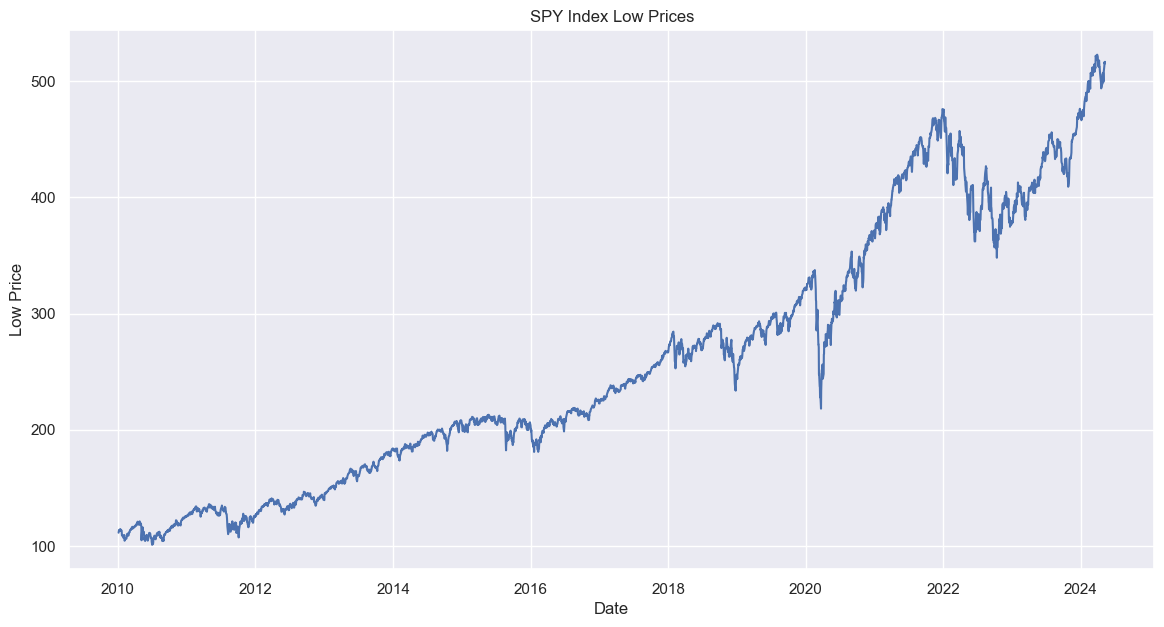

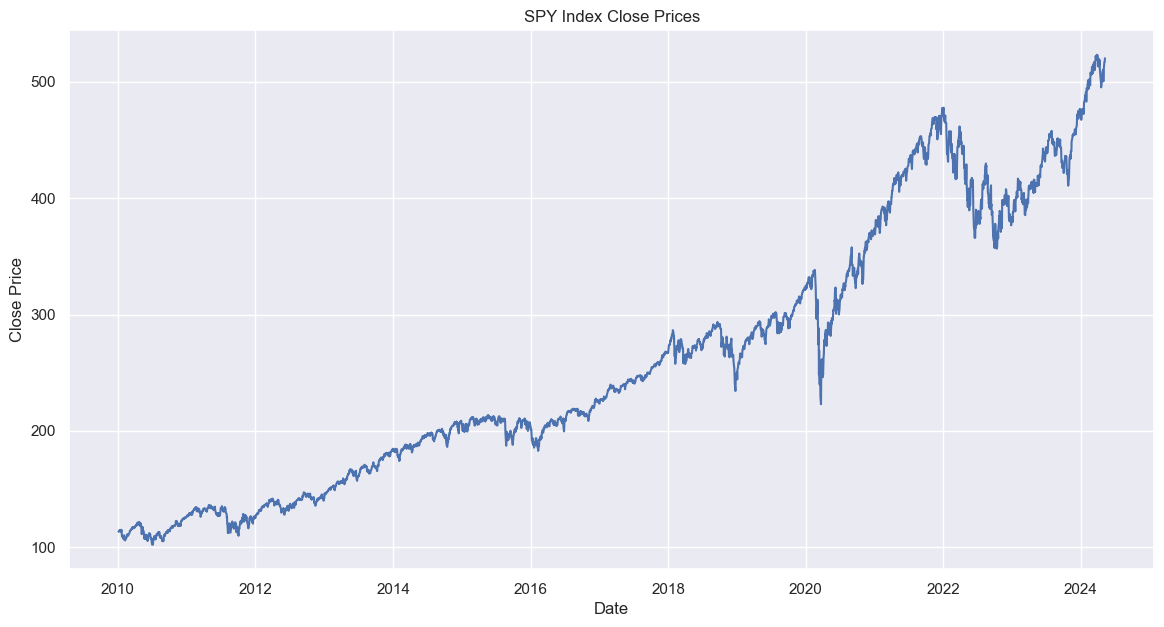

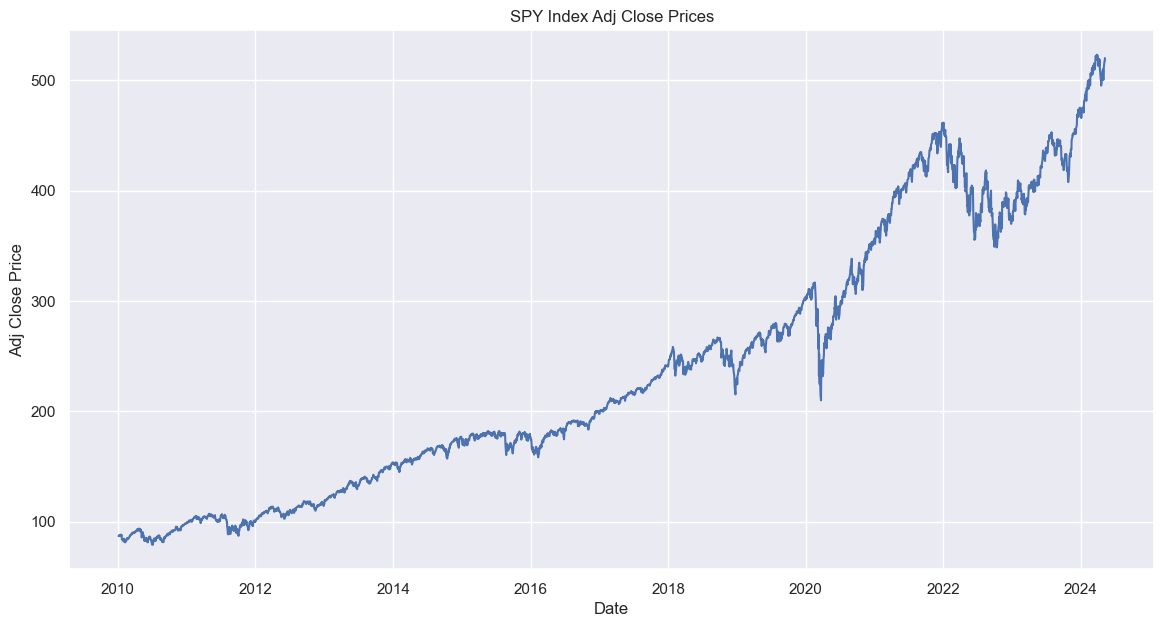

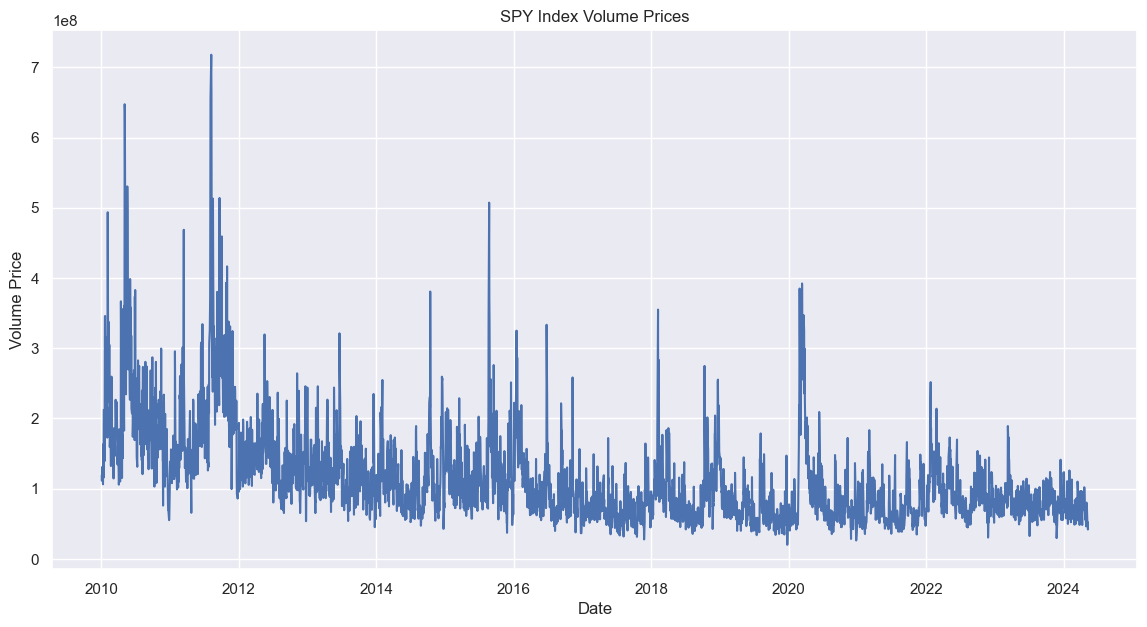

In [224]:

import seaborn as sns

sns.set(style="darkgrid")

for column in spy_data.columns:
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=spy_data, x=spy_data.index, y=column)
    plt.title(f'SPY Index {column} Prices')
    plt.xlabel('Date')
    plt.ylabel(f'{column} Price')
    plt.grid(True)
    plt.show()


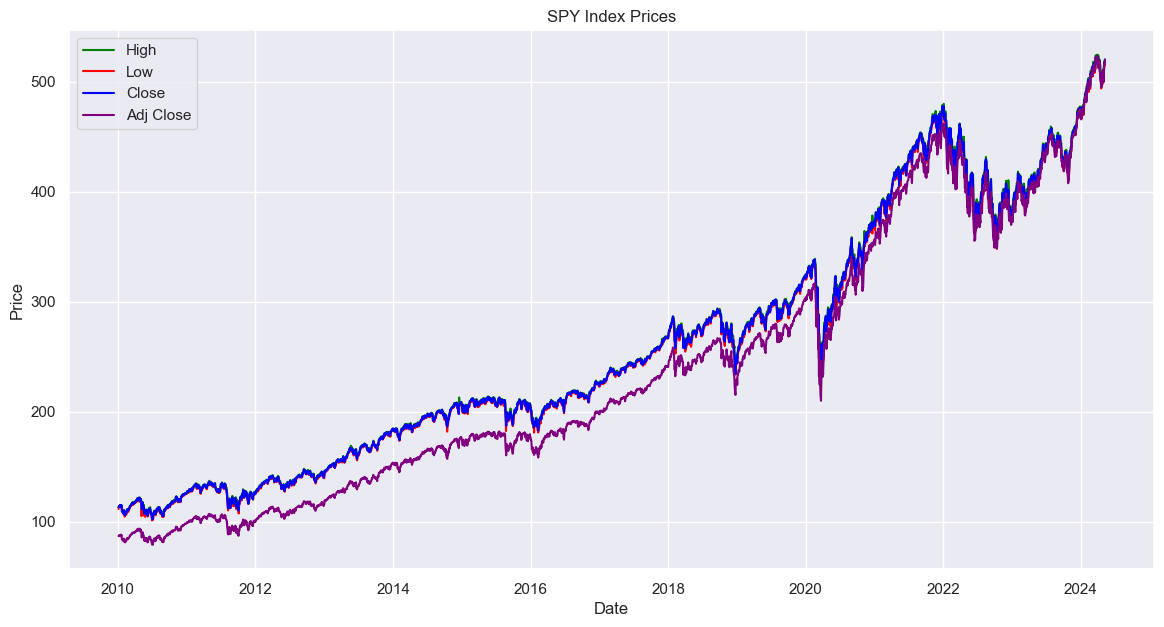

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=spy_data, x='Date', y='High', label='High', color='green')
sns.lineplot(data=spy_data, x='Date', y='Low', label='Low', color='red')
sns.lineplot(data=spy_data, x='Date', y='Close', label='Close', color='blue')
sns.lineplot(data=spy_data, x='Date', y='Adj Close', label='Adj Close', color='purple')

plt.title('SPY Index Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


*Checking for white Noise*

Mean: 259.5123077681941
Variance: 12599.100466743588


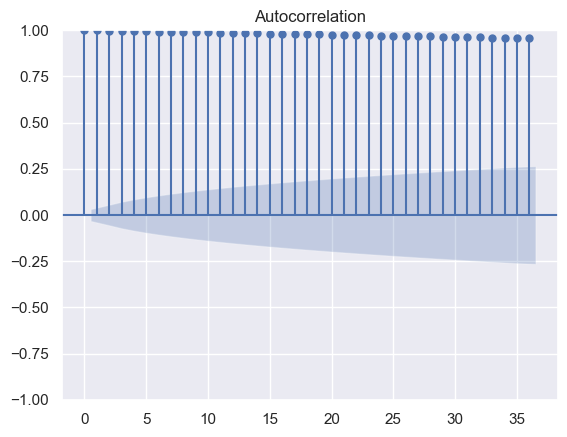

In [226]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

mean = spy_data['Close'].mean()
variance = spy_data['Close'].var()
print(f'Mean: {mean}\nVariance: {variance}')

plot_acf(spy_data['Close'])
plt.show()


No white Noise. Closing prices depict a clear pattern. 

In [227]:
spy_data['Return'] = spy_data.Close.pct_change()
spy_data.Return.bfill(inplace=True)

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\3499848316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spy_data.Return.bfill(inplace=True)


In [228]:
spy_data.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,86.860046,118944600.0,0.002647
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.089989,111579900.0,0.002647
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.151283,116074400.0,0.000704
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.519241,131091100.0,0.004221
2010-01-08,113.889999,114.620003,113.660004,114.570000,87.810463,126402800.0,0.003328


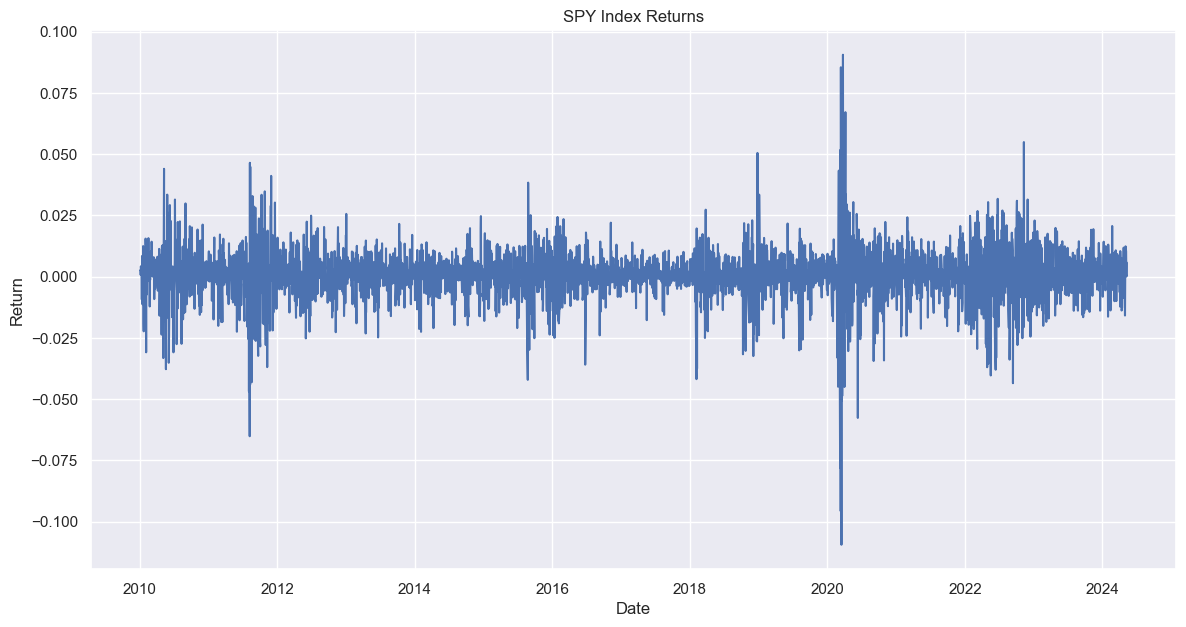

In [229]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=spy_data, x=spy_data.index, y='Return')
plt.title('SPY Index Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()

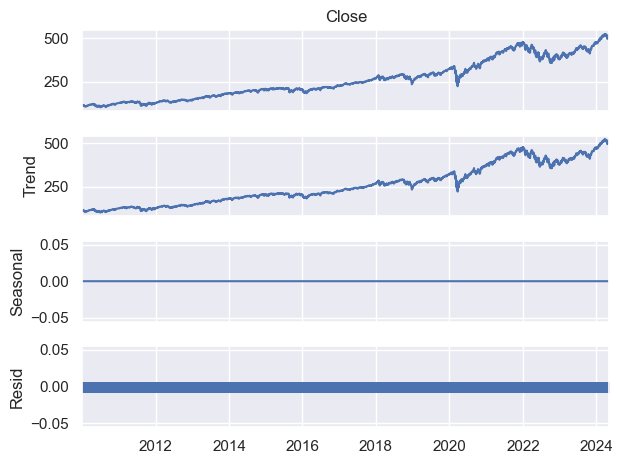

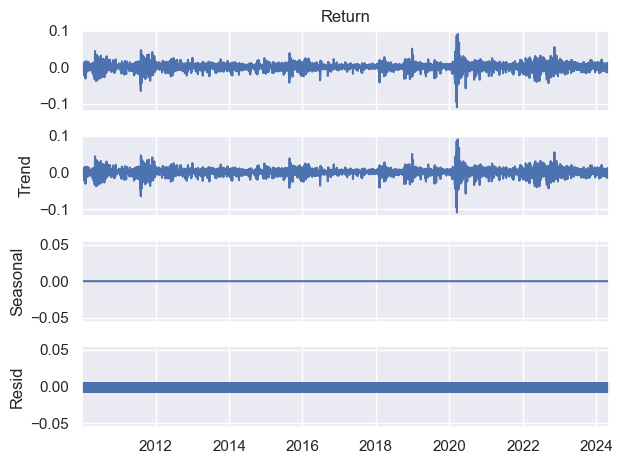

In [230]:

from statsmodels.tsa.seasonal import seasonal_decompose

result_close = seasonal_decompose(spy_data['Close'], model='additive', period=1)
result_close.plot()
plt.show()

result_return = seasonal_decompose(spy_data['Return'], model='additive', period=1)
result_return.plot()
plt.show()


**Checking whether there is a trend**

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


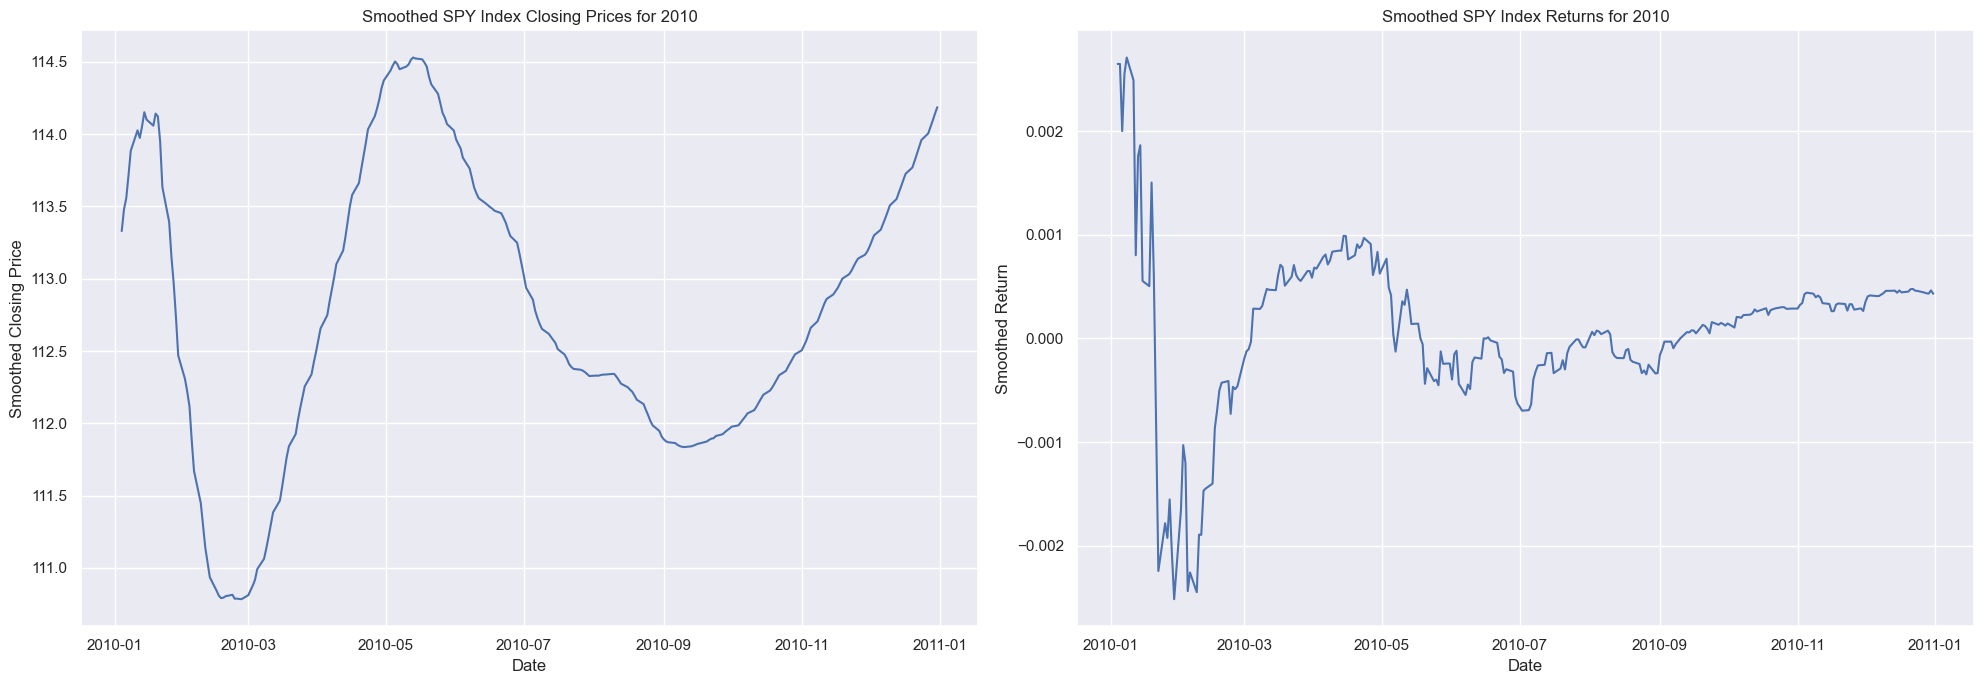

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


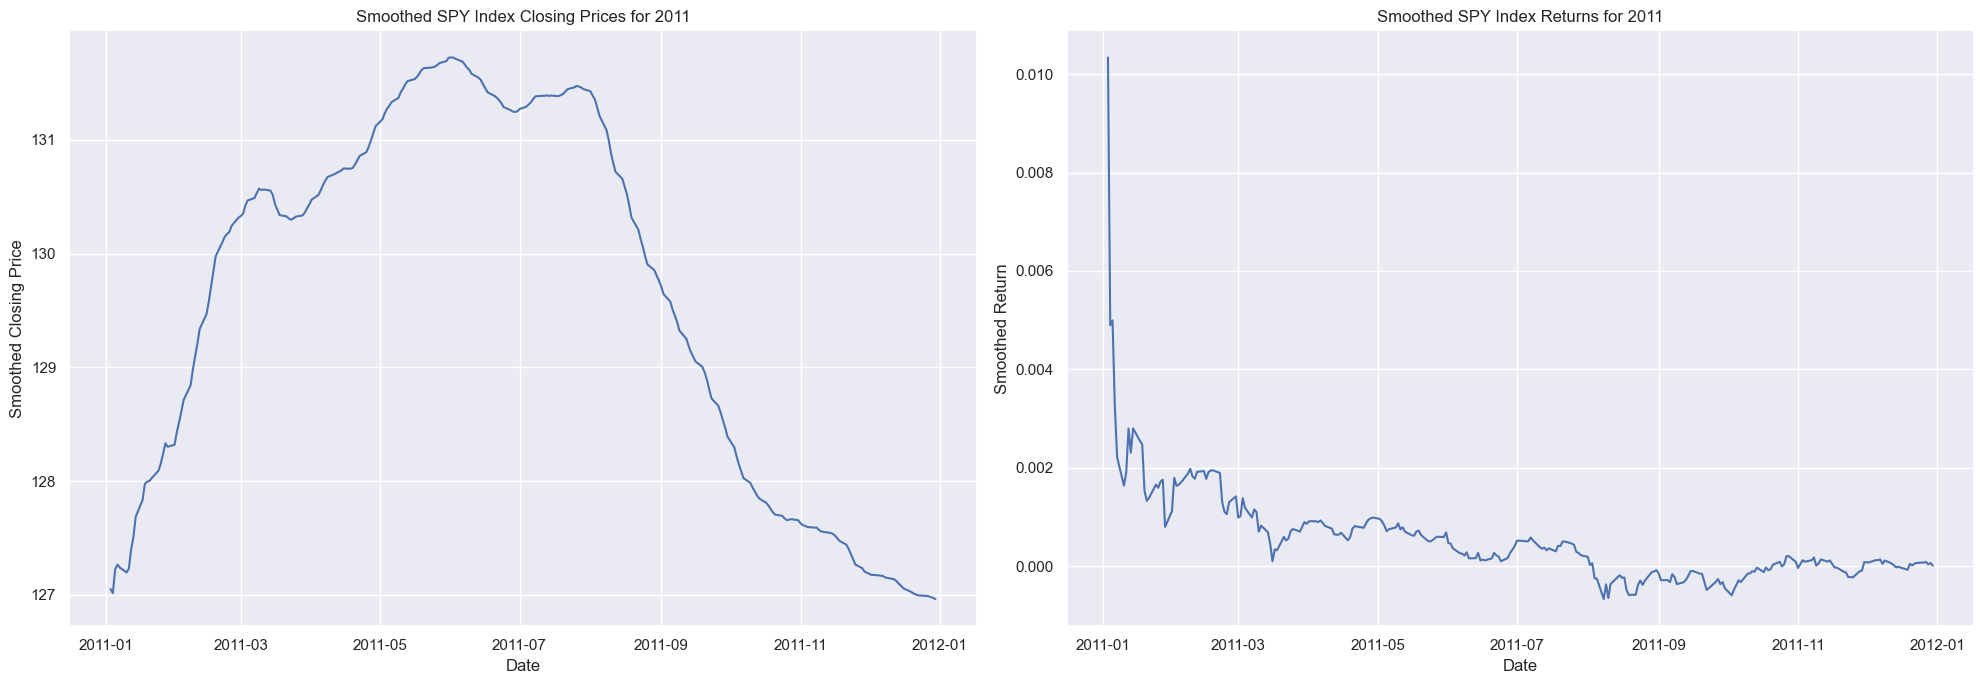

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


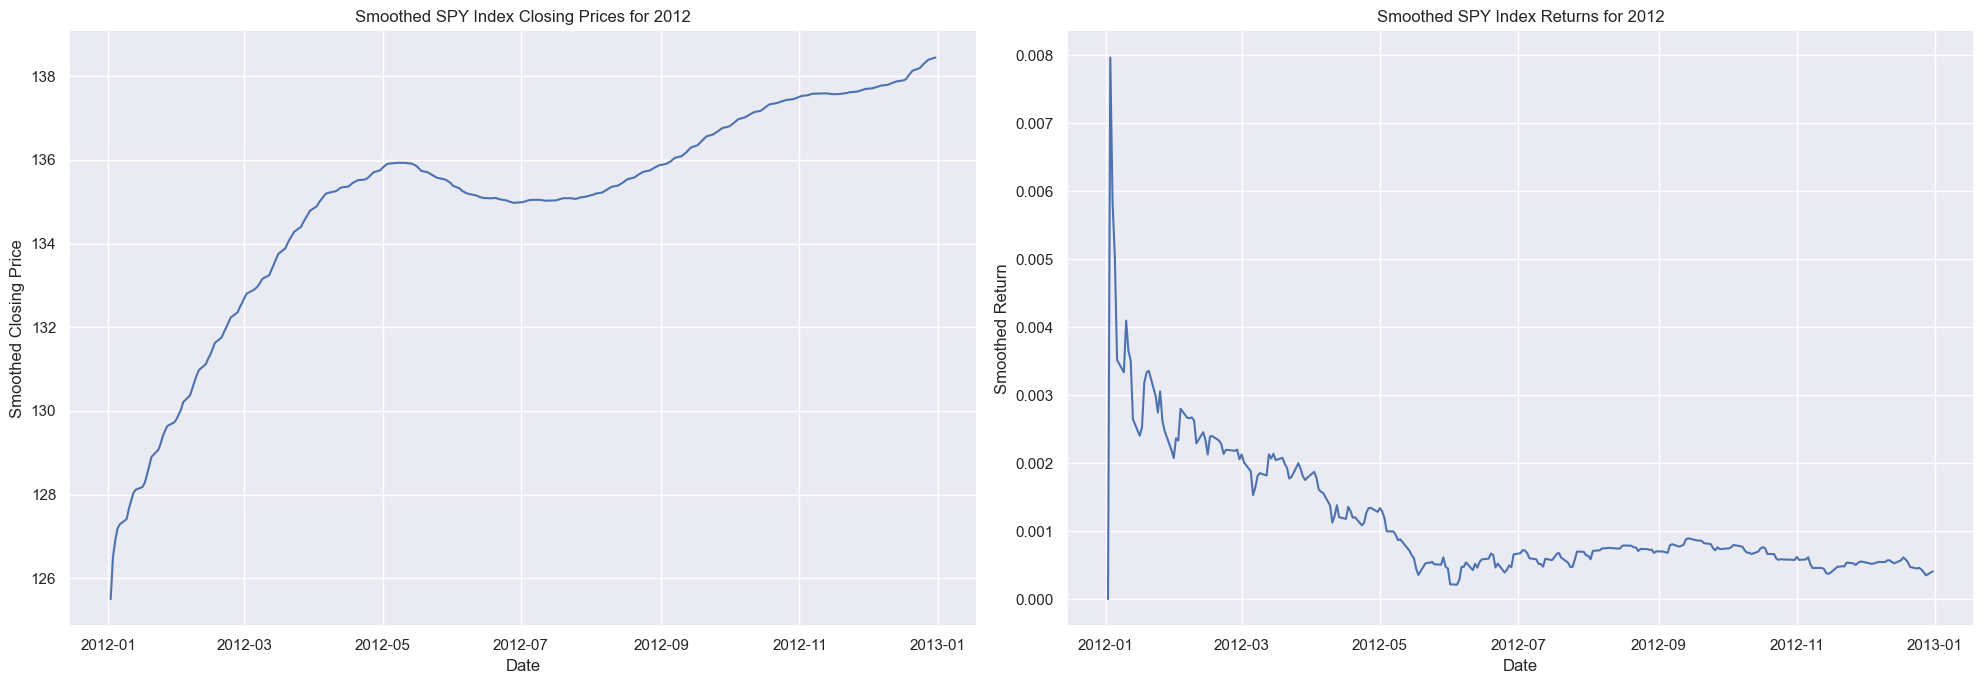

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


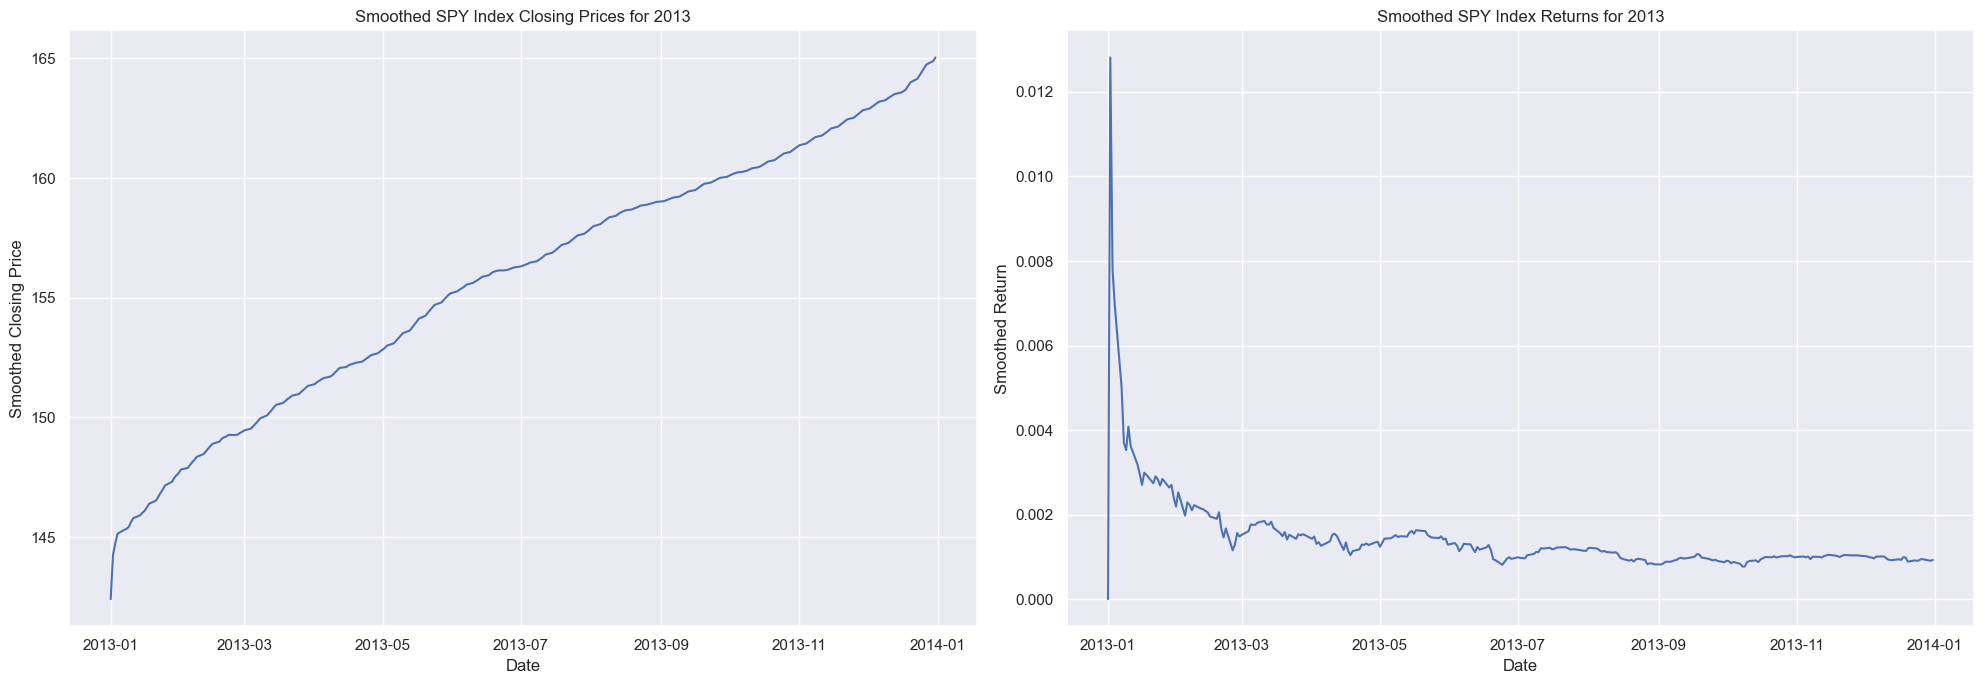

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


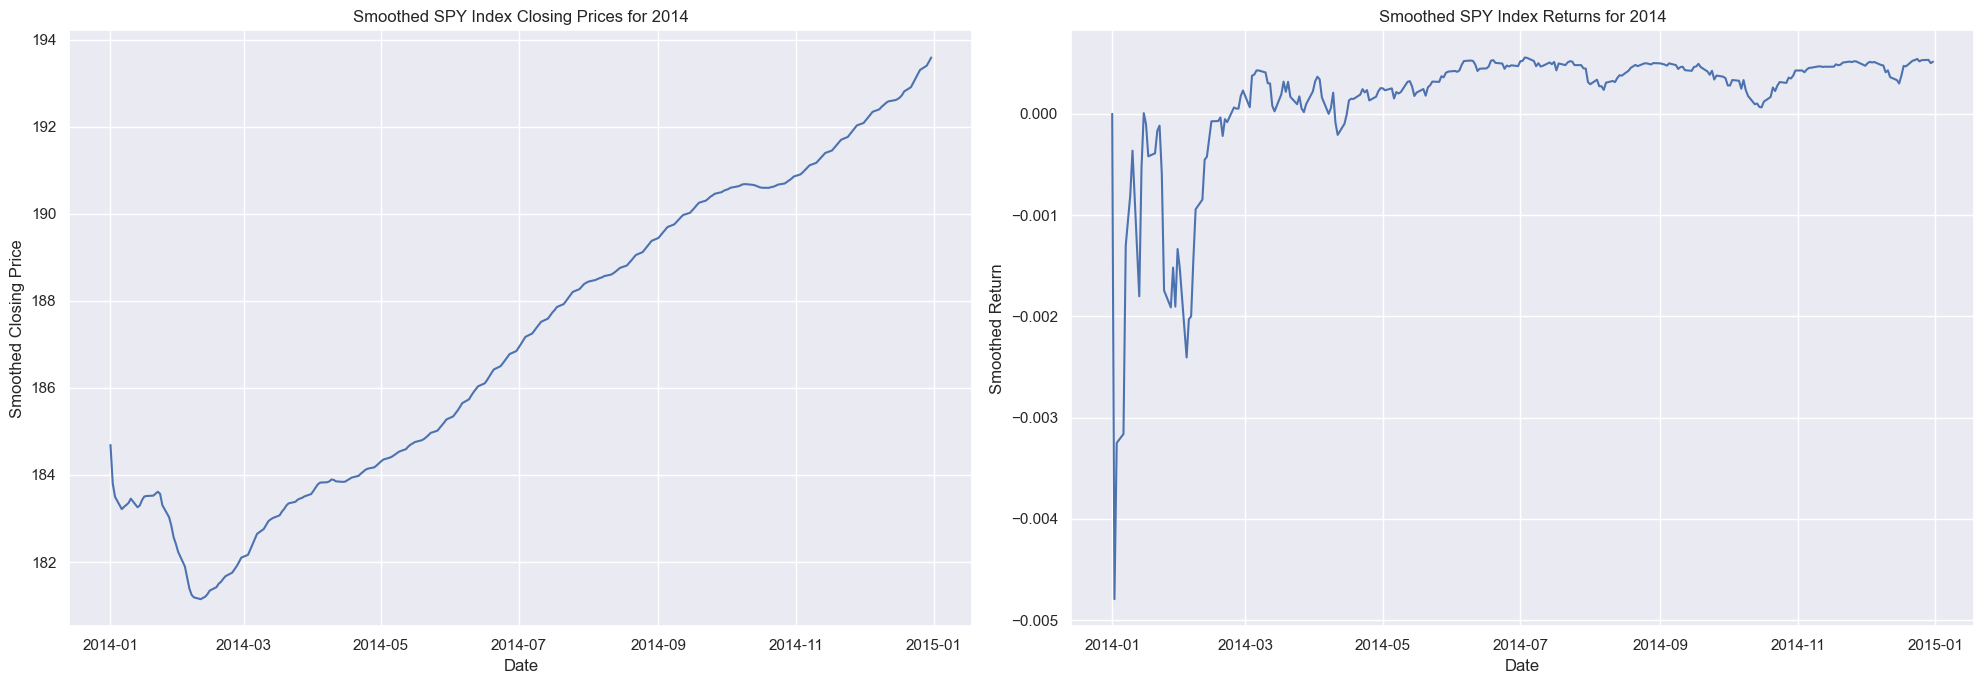

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


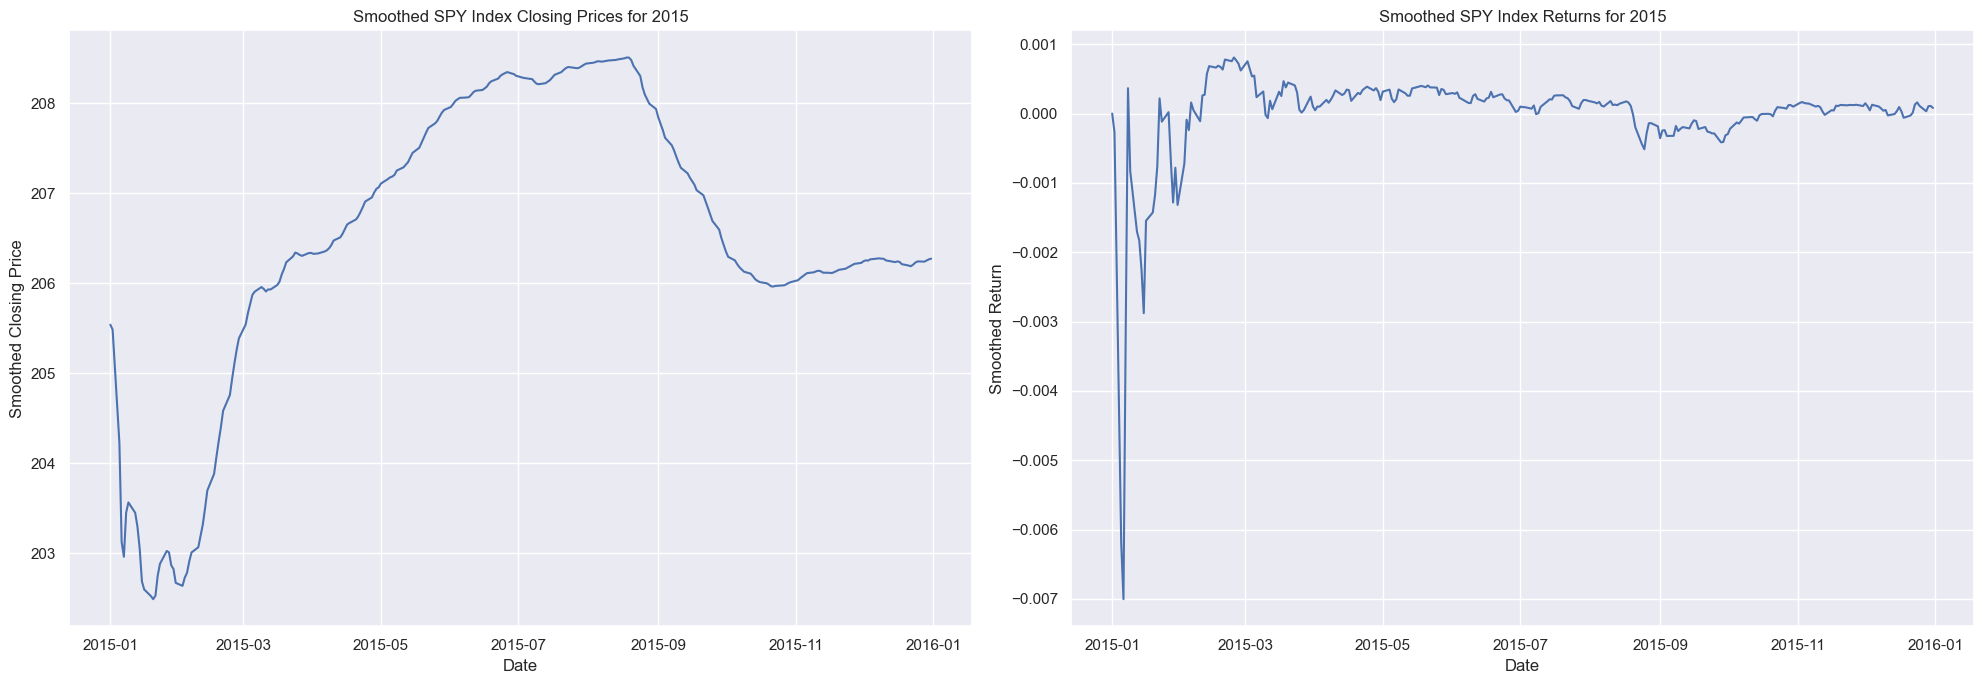

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


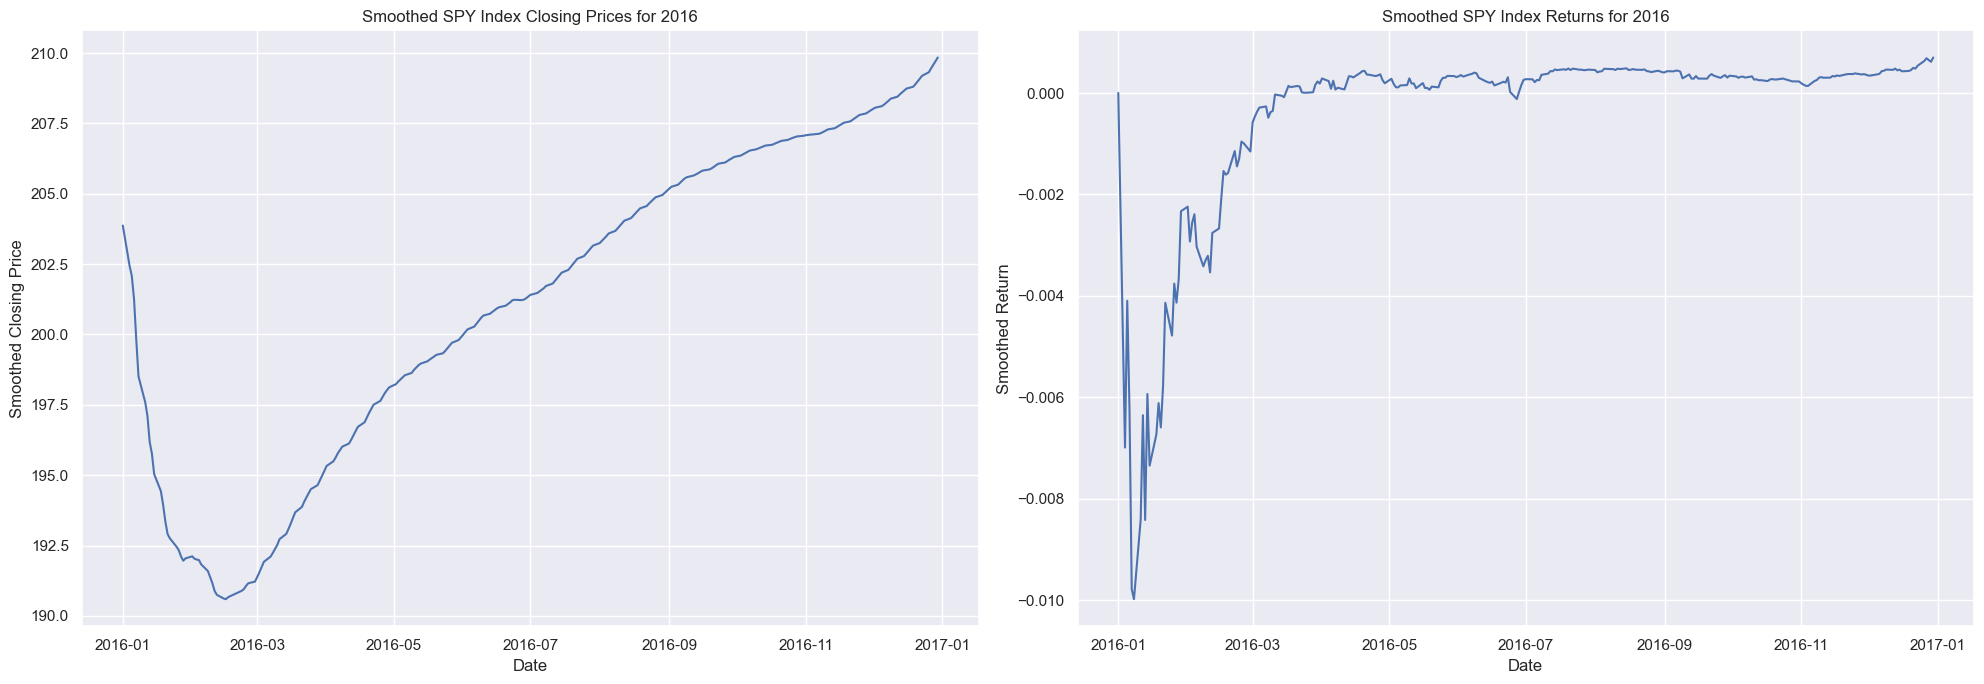

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


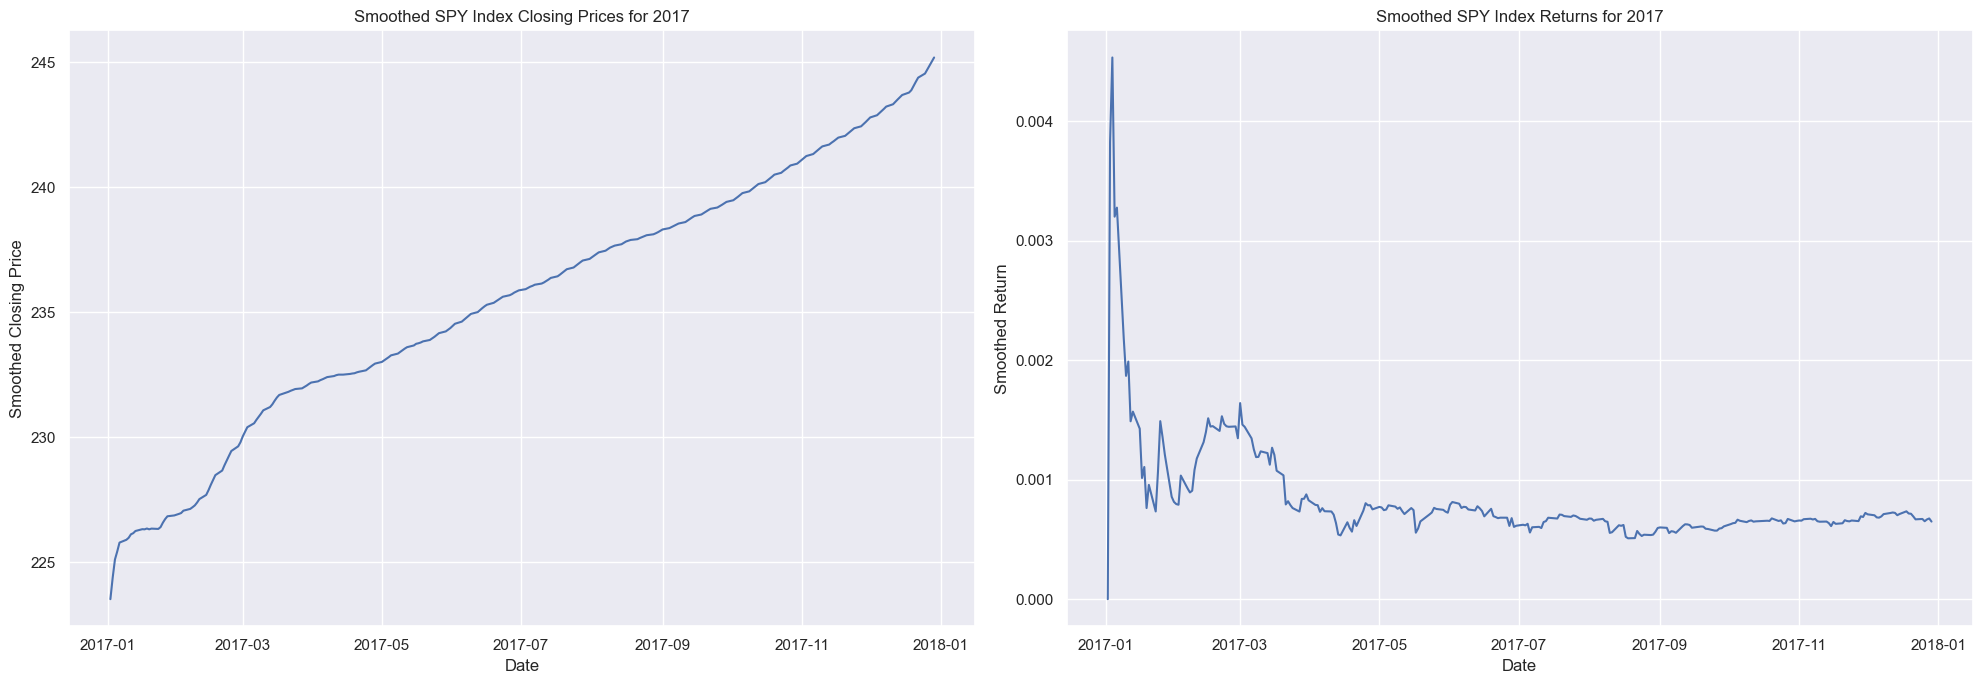

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


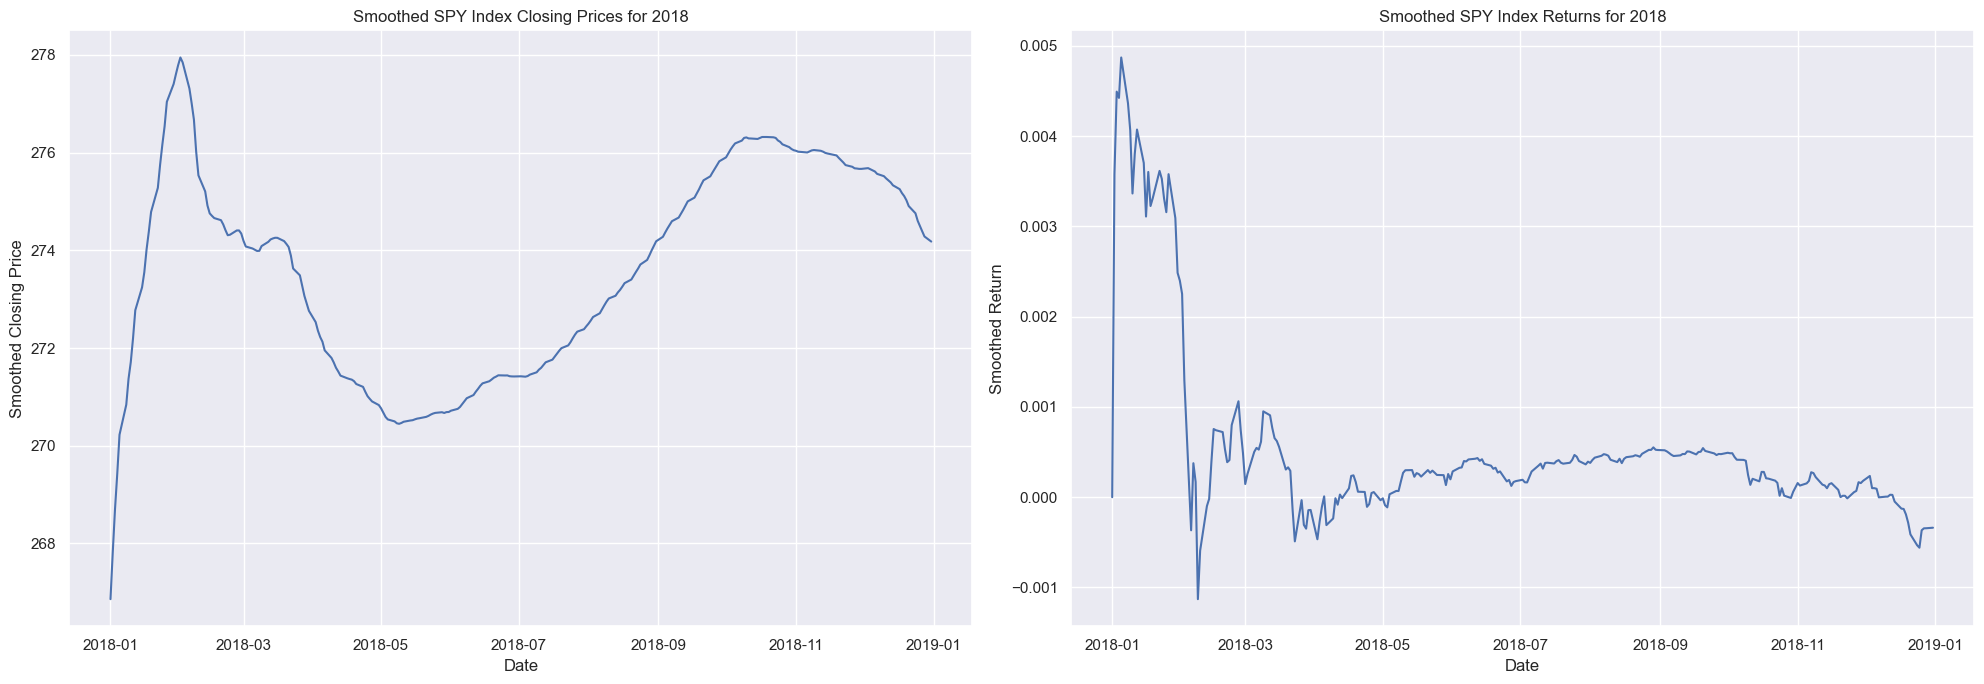

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


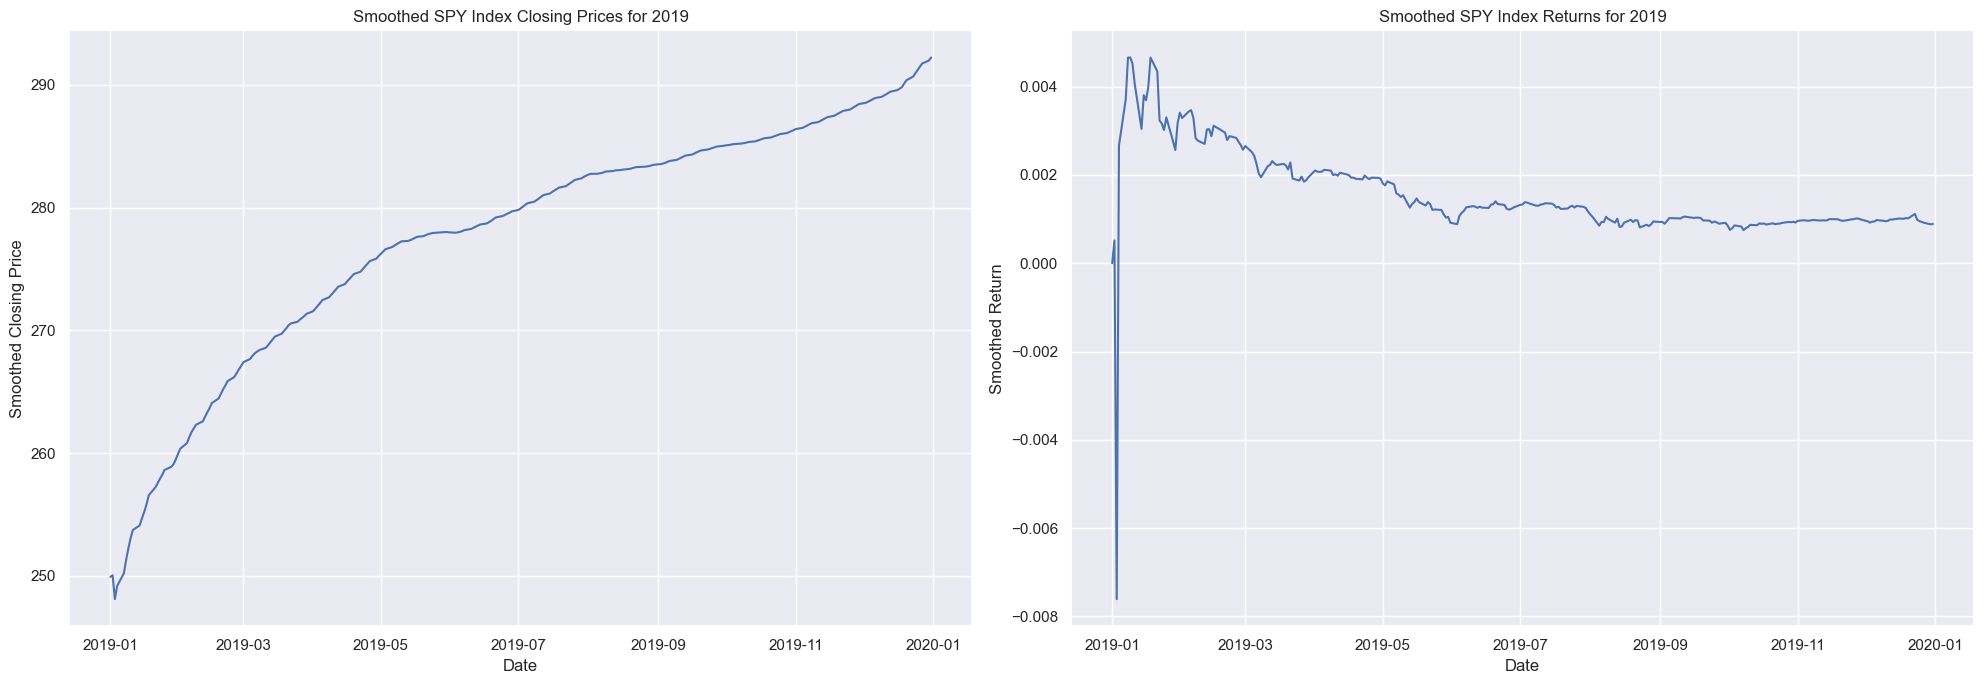

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


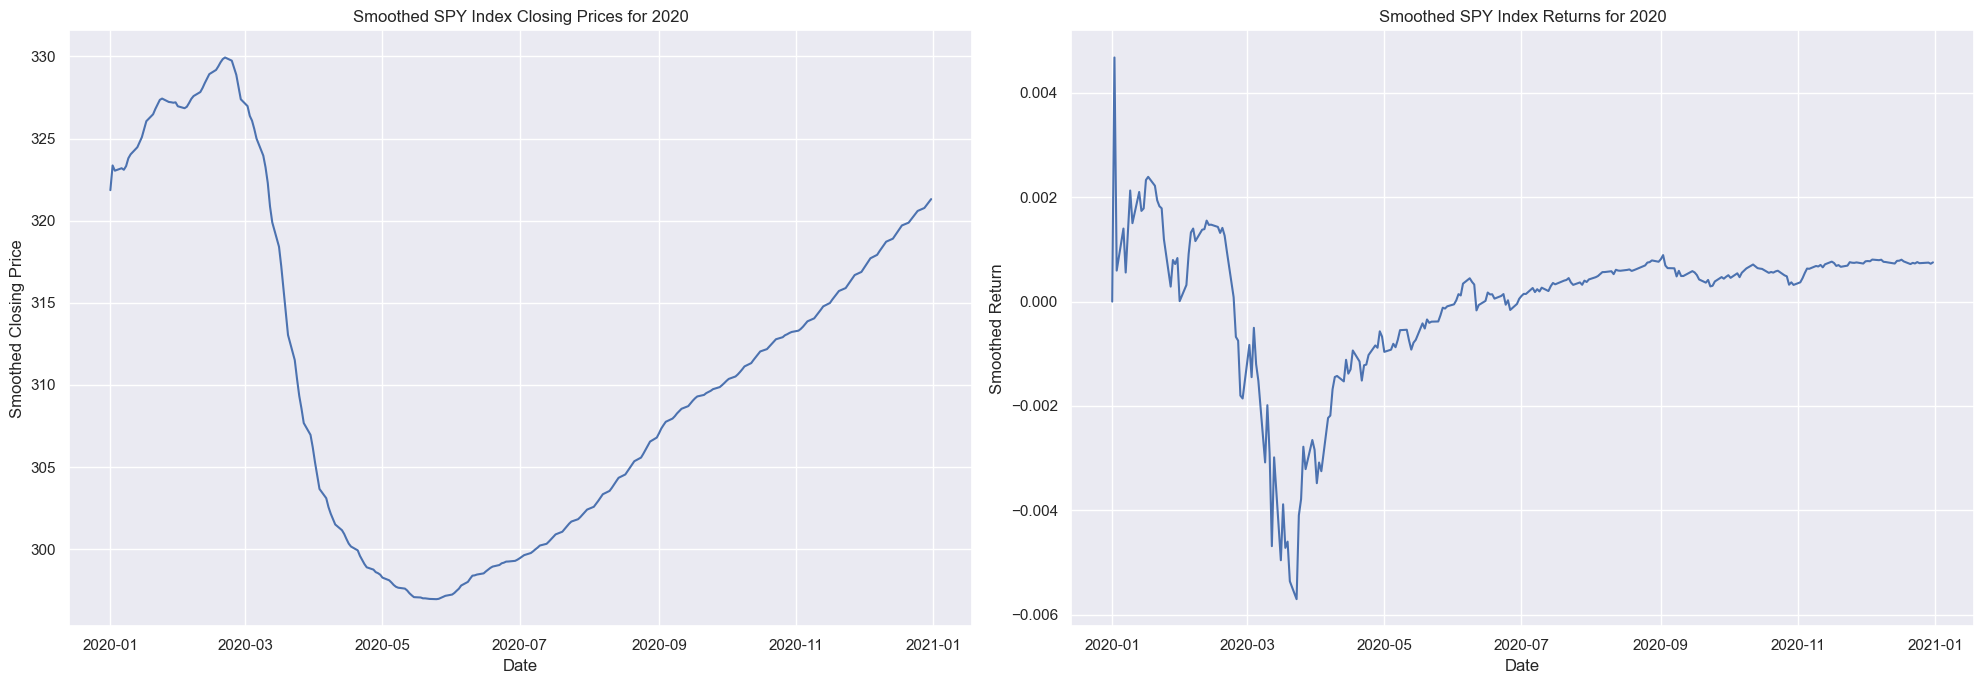

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


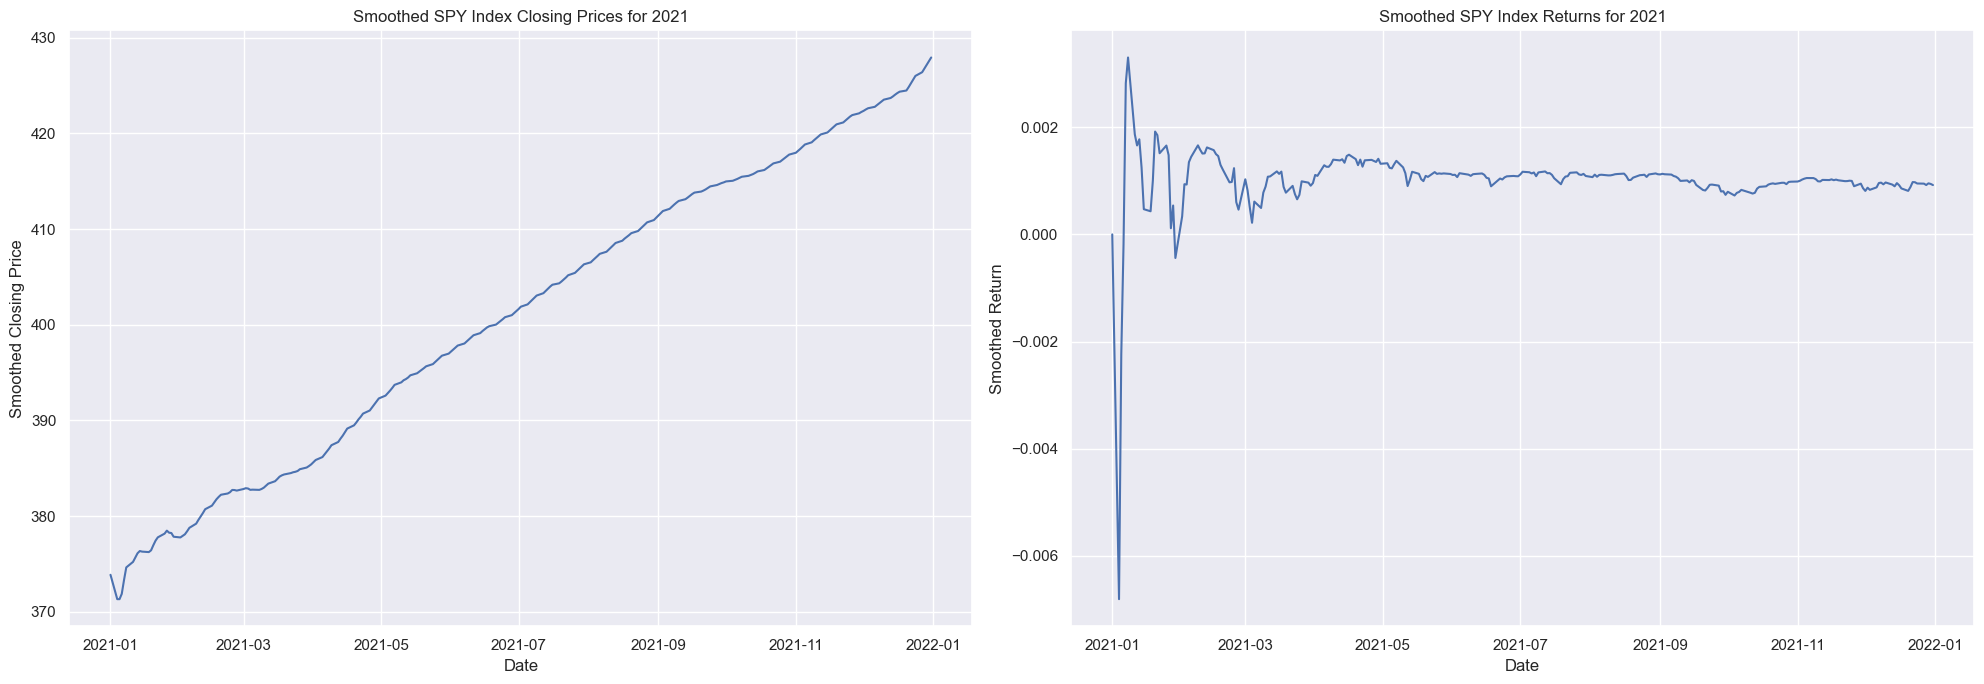

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


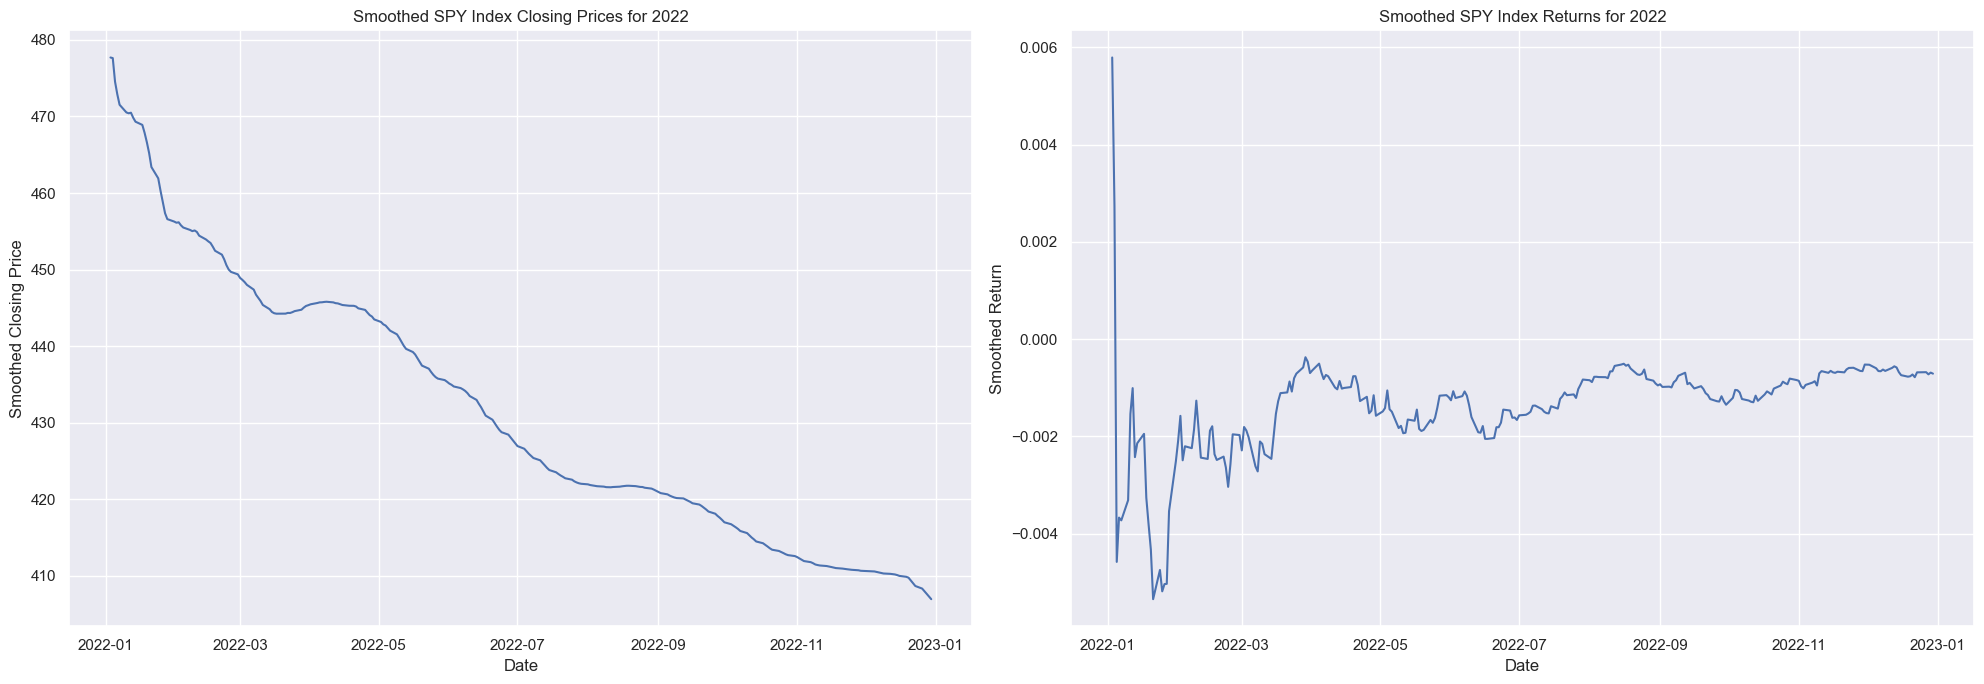

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


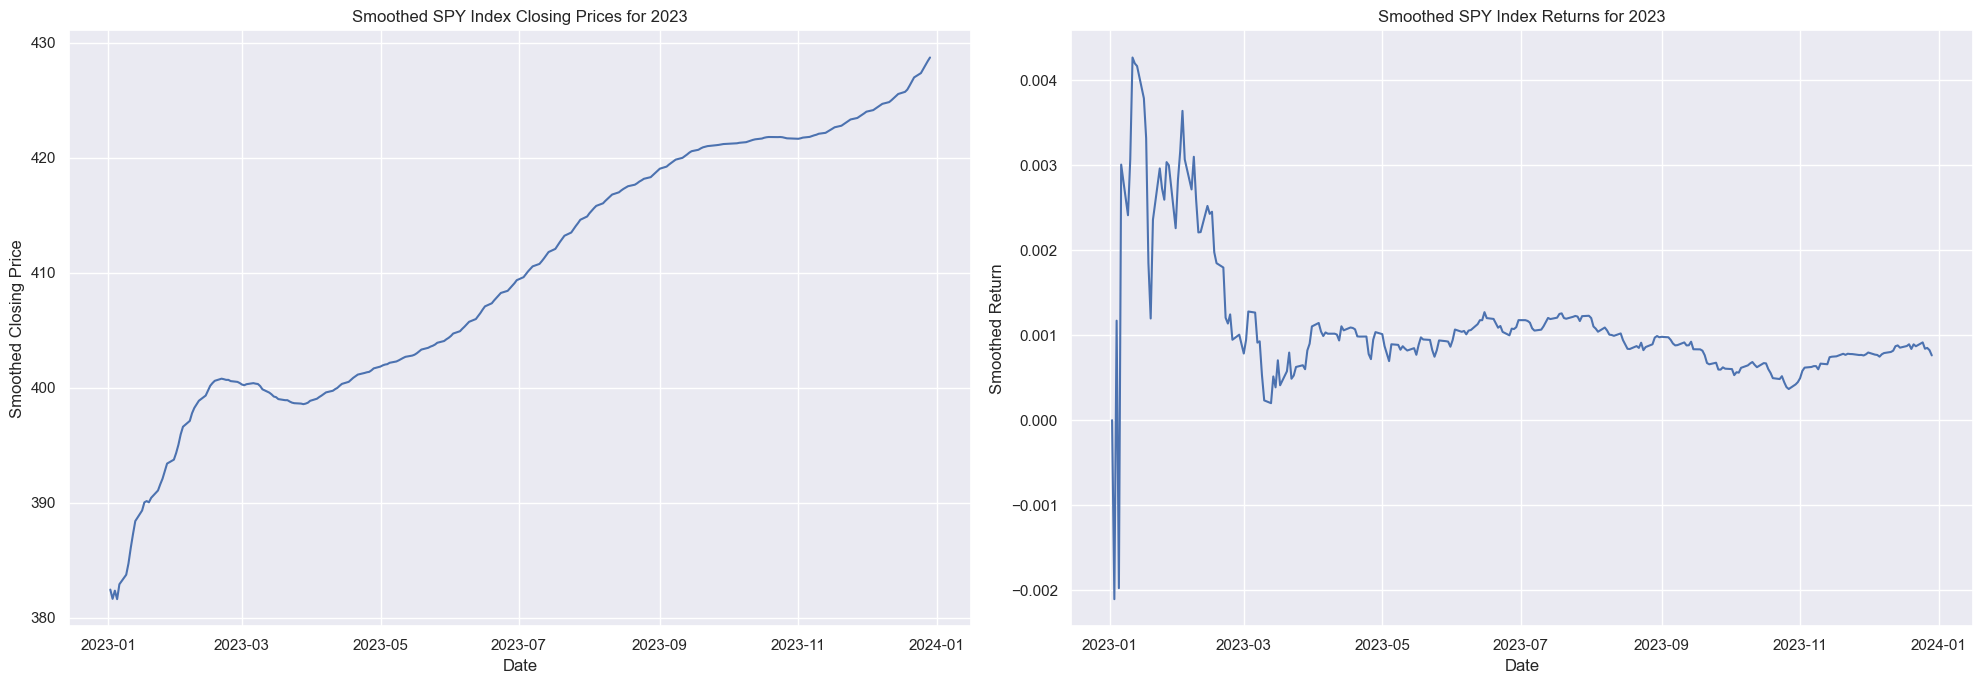

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7552\78926610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()


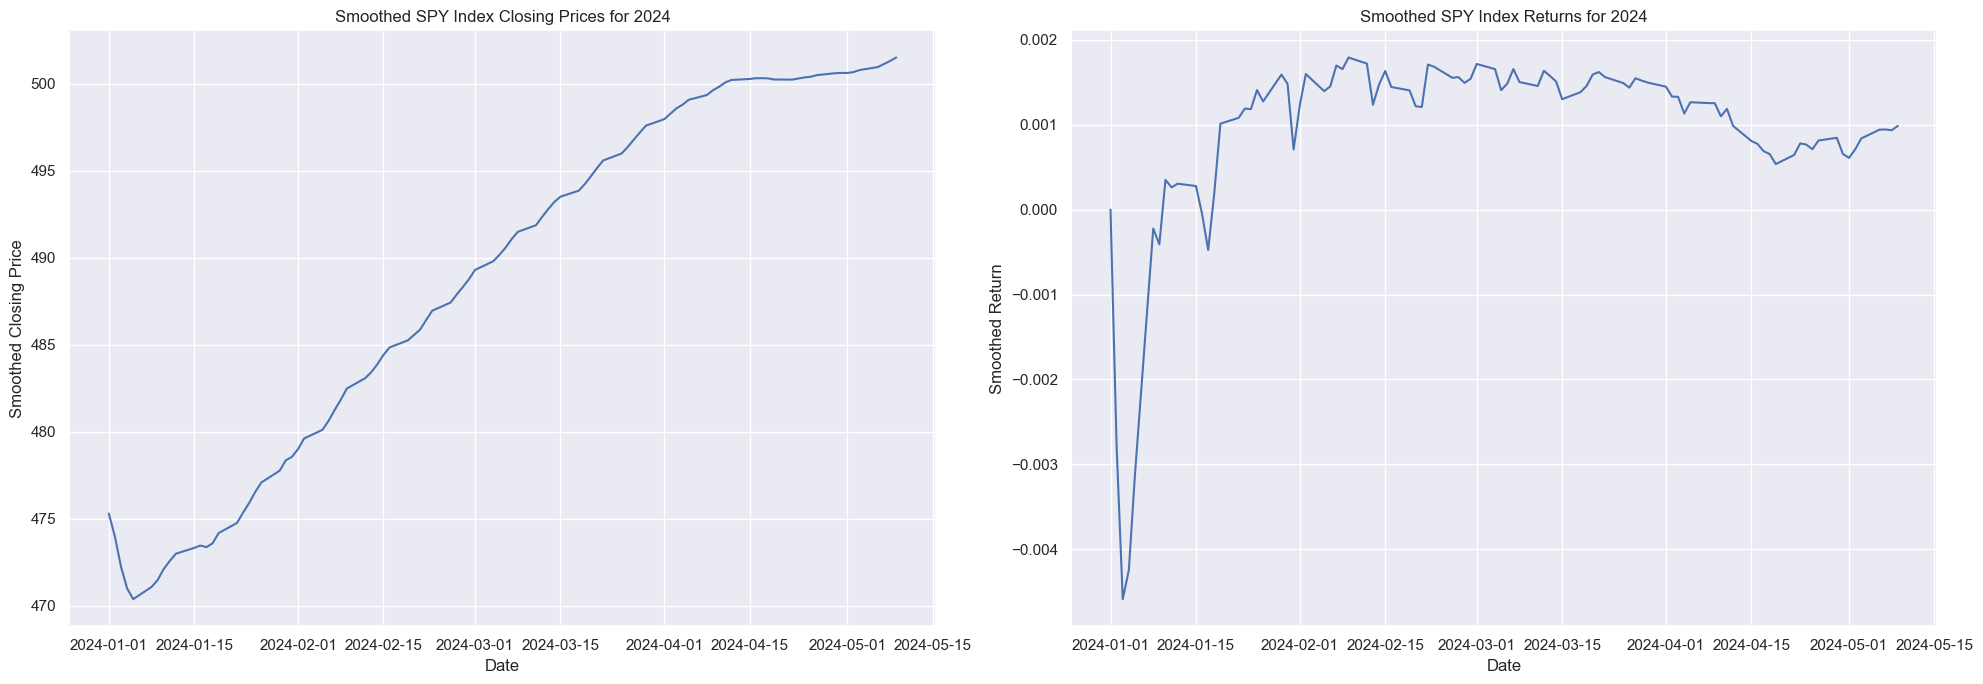

In [231]:


for year in range(2010, 2025):
    yearly_data = spy_data[spy_data.index.year == year]
    
    yearly_data['Close_Smooth'] = yearly_data['Close'].rolling(window=252, min_periods=1).mean()
    yearly_data['Return_Smooth'] = yearly_data['Return'].rolling(window=252, min_periods=1).mean()

    fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    
    sns.lineplot(data=yearly_data, x=yearly_data.index, y='Close_Smooth', ax=axs[0])
    axs[0].set_title(f'Smoothed SPY Index Closing Prices for {year}')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Smoothed Closing Price')
    axs[0].grid(True)

    sns.lineplot(data=yearly_data, x=yearly_data.index, y='Return_Smooth', ax=axs[1])
    axs[1].set_title(f'Smoothed SPY Index Returns for {year}')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Smoothed Return')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


**Check for Stationarity**

In [232]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(time_series):
    result = adfuller(time_series)
    
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    
    if result[1] < 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

check_stationarity(spy_data['Close'])
check_stationarity(spy_data['Return'])


ADF Statistic: 0.620728
p-value: 0.988116
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is not stationary.
ADF Statistic: -16.553158
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The time series is stationary.


In [233]:
spy_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Return'], dtype='object')

***Feature Scaling***


In [234]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
spy_data_scaled = spy_data.copy()
spy_data_scaled['Close'] = scaler.fit_transform(spy_data['Close'].values.reshape(-1,1))

In [235]:
spy_data_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,0.026439,86.860046,118944600.0,0.002647
2010-01-05,113.260002,113.680000,112.849998,0.027152,87.089989,111579900.0,0.002647
2010-01-06,113.519997,113.989998,113.430000,0.027342,87.151283,116074400.0,0.000704
2010-01-07,113.500000,114.330002,113.180000,0.028482,87.519241,131091100.0,0.004221
2010-01-08,113.889999,114.620003,113.660004,0.029385,87.810463,126402800.0,0.003328


***Creating Time Steps***

In [236]:


def create_sequences(data, time_steps):
    X = []
    y = []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i])
        y.append(data[i])
    return np.array(X), np.array(y)

data = spy_data_scaled['Close'].values

time_steps = 60

X, y = create_sequences(data, time_steps)


***Train_test_split***

In [237]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



In [238]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))

model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32)


c:\Users\ELITEBOOK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - loss: 0.0175
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0014
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0012
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.0013
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 0.0010
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0010
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.0011
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - loss: 8.6920e-04
Epoch 9/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 8.5289e-04
Epoch 10/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 8.0365e-04
Epoch 11/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 6.4758e-04
Epoch 12/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0013
Epoch 13/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 8.4241e-04
Epoch 14/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 6.9867e-04
Epoch 15/50
93/93 ━━━━━━━━

In [ ]:

predictions = model.predict(X_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step


In [ ]:

predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1))


In [ ]:
predictions_original_scale

array([[432.36115],
       [432.8216 ],
       [433.11386],
       [432.9115 ],
       [431.72586],
       [430.36264],
       [429.5442 ],
       [429.50656],
       [430.51822],
       [432.3617 ],
       [434.38037],
       [436.11652],
       [437.4986 ],
       [438.2694 ],
       [438.37268],
       [438.28943],
       [438.02502],
       [437.92224],
       [438.11273],
       [438.51154],
       [439.05322],
       [439.727  ],
       [440.54785],
       [441.4731 ],
       [442.46692],
       [443.13986],
       [442.97607],
       [442.14764],
       [441.28458],
       [441.0181 ],
       [441.46454],
       [442.51016],
       [443.6139 ],
       [444.85574],
       [446.263  ],
       [447.59647],
       [448.69955],
       [449.6058 ],
       [450.27927],
       [450.71338],
       [450.78973],
       [450.52777],
       [449.8884 ],
       [448.72556],
       [447.37708],
       [445.91647],
       [444.89066],
       [444.37668],
       [443.80115],
       [442.42795],


In [ ]:
y_test_original_scale

array([[436.23999023],
       [434.75      ],
       [431.33999634],
       [424.97000122],
       [431.05999756],
       [434.54998779],
       [435.45999146],
       [439.94000244],
       [441.01998901],
       [439.01000977],
       [438.82998657],
       [440.6499939 ],
       [438.51000977],
       [437.58999634],
       [441.1499939 ],
       [438.98001099],
       [441.76000977],
       [442.48999023],
       [442.13000488],
       [442.67999268],
       [443.77999878],
       [445.10998535],
       [445.92001343],
       [446.97000122],
       [444.04000854],
       [439.17999268],
       [439.85998535],
       [443.35998535],
       [447.26000977],
       [447.97000122],
       [448.91000366],
       [446.26000977],
       [450.25      ],
       [452.23001099],
       [451.55999756],
       [451.79998779],
       [453.19000244],
       [453.07998657],
       [453.07998657],
       [451.45999146],
       [450.91000366],
       [448.98001099],
       [445.44000244],
       [446

In [ ]:

df = pd.DataFrame({'Actual': y_test_original_scale.flatten(), 'Predicted': predictions_original_scale.flatten()})

df.head()


,Actual,Predicted
0,436.239990,432.361145
1,434.750000,432.821594
2,431.339996,433.113861
3,424.970001,432.911499
4,431.059998,431.725861
5,434.549988,430.362640
6,435.459991,429.544189
7,439.940002,429.506561
8,441.019989,430.518219
9,439.010010,432.361694


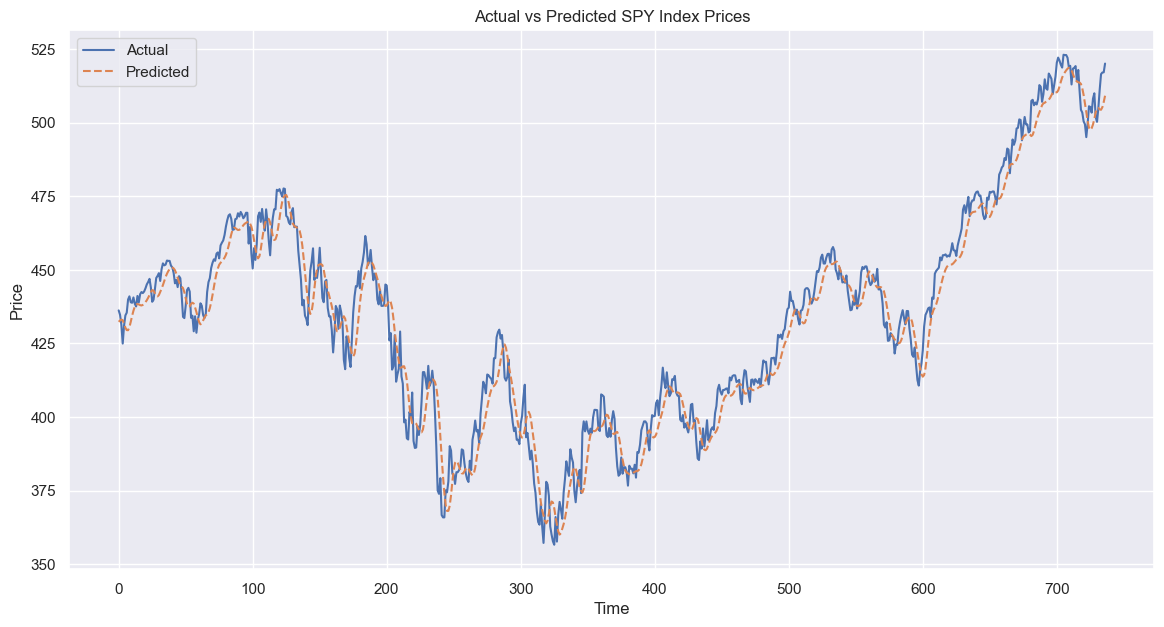

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Actual'], label='Actual')
plt.plot(df['Predicted'], label='Predicted', linestyle='dashed')
plt.title('Actual vs Predicted SPY Index Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test_original_scale, predictions_original_scale))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 7.816


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_original_scale, predictions_original_scale)
print('Test R2: %.3f' % r2)


Test R2: 0.957


In [ ]:

from datetime import datetime, timedelta

today = datetime.today().strftime('%Y-%m-%d')

dates = pd.bdate_range(start=today, periods=6)[1:] 

predictions_df = pd.DataFrame(columns=['Date', 'Predicted'])

for i in range(5):
    prediction = model.predict(input_data)
    
    predictions_df.loc[i] = [dates[i], prediction[0][0]]
    
    input_data = np.concatenate((input_data[:,1:,:], prediction.reshape(1,1,1)), axis=1)

predictions_df['Predicted'] = scaler.inverse_transform(predictions_df['Predicted'].values.reshape(-1, 1))

predictions_df


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


,Date,Predicted
0,2024-05-13,523.032410
1,2024-05-14,523.154175
2,2024-05-15,522.692017
3,2024-05-16,521.826111
4,2024-05-17,520.746826
